# Problem Statement: Analyze the data and perform EDA to find intresting patterns and insights from the data. Write some useful recommendation to the netflix team.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
netflix=pd.read_csv('netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.shape

(8807, 12)

There are 8807 rows with 12 columns.

Step1. Handling NaN/null values:

In [ ]:
netflix.isna().sum() #This shows sum of null values across each column

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix.fillna({'director': 'Unknown Director', 'cast': 'Unknown Actor ', 'country': 'Unknown'}, inplace=True)
netflix.fillna(0, inplace=True)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix.isna().sum() # Now there are no null values

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Step2. Un-nesting the columns:

In [ ]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix['Movie_Mins'] = netflix[netflix['type'] == 'Movie']['duration'].astype(str)
netflix.apply(lambda x: int(x.split(' ')[0]) if 'min' in x else 0)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_Mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158 min
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88 min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88 min


In [ ]:
netflix['Num_of_seasons'] = netflix[netflix['type'] == 'TV Show']['duration'].astype(str)
netflix.apply(lambda x: int(x.split(' ')[0]) if ('Season' in x or 'Seasons' in x) else 0)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_Mins,Num_of_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min,NaN
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1 Season
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1 Season
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158 min,NaN
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,2 Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88 min,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88 min,NaN


In [ ]:
netf_data = netflix['director'].apply(lambda x:x.split(',')).tolist()
netf_data

[['Kirsten Johnson'],
 ['Unknown Director'],
 ['Julien Leclercq'],
 ['Unknown Director'],
 ['Unknown Director'],
 ['Mike Flanagan'],
 ['Robert Cullen', ' José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['Unknown Director'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['Unknown Director'],
 ['Unknown Director'],
 ['Pedro de Echave García', ' Pablo Azorín Williams'],
 ['Unknown Director'],
 ['Adam Salky'],
 ['Unknown Director'],
 ['Olivier Megaton'],
 ['Unknown Director'],
 ['K.S. Ravikumar'],
 ['Alex Woo', ' Stanley Moore'],
 ['S. Shankar'],
 ['Unknown Director'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', ' Abhishek Chaubey', ' Saket Chaudhary'],
 ['Unknown Director'],
 ['Unknown Director'],
 ['Unknown Director'],
 ['Unknown Director'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['Unknown Director'],
 ['George Nolfi'],
 ['Unknown Director'],
 ['Unknown Director'],
 ['St

In [ ]:
director_details=pd.DataFrame(netf_data,index=netflix['title']).stack().reset_index().drop(columns='level_1')
director_details.rename(columns={0:'dname'},inplace=True)
director_details.head()

,title,dname
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown Director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown Director
4,Kota Factory,Unknown Director


Hence The director Houssam El-Din Mustafa directed the longest movie.

Q1. Find the counts of each categorical variable both using graphical and nongraphical
analysis.

In [ ]:
director_details['dname'].value_counts()

,count
dname,
Unknown Director,2634
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
...,...
Ivona Juka,1
James Brown,1
Mark Risley,1


TOP DIRECTOR WITH NUMBER OF TITLES:
The above count shows that 'Rajiv Chilaka' has directed the most number of movies/shows on Netflix.
(However the dataset contains most number of movies/shows with Unknown entries)

In [ ]:
netflix['genres'] = netflix['listed_in'].apply(lambda x: x.split(', '))
netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_Mins,Num_of_seasons,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min,NaN,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1 Season,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1 Season,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2 Seasons,"[International TV Shows, Romantic TV Shows, TV..."


In [ ]:
genre_details = netflix[['title', 'genres']].explode('genres')
genre_details.rename(columns={'genres': 'genre_det'}, inplace=True)
genre_details.head()


,title,genre_det
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [ ]:
genre_details['genre_det'].value_counts()

,count
genre_det,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


The above output shows the most popular genre as International movies ,followed by Dramas,Comedies and so on.The same is depicted with the barplot below.

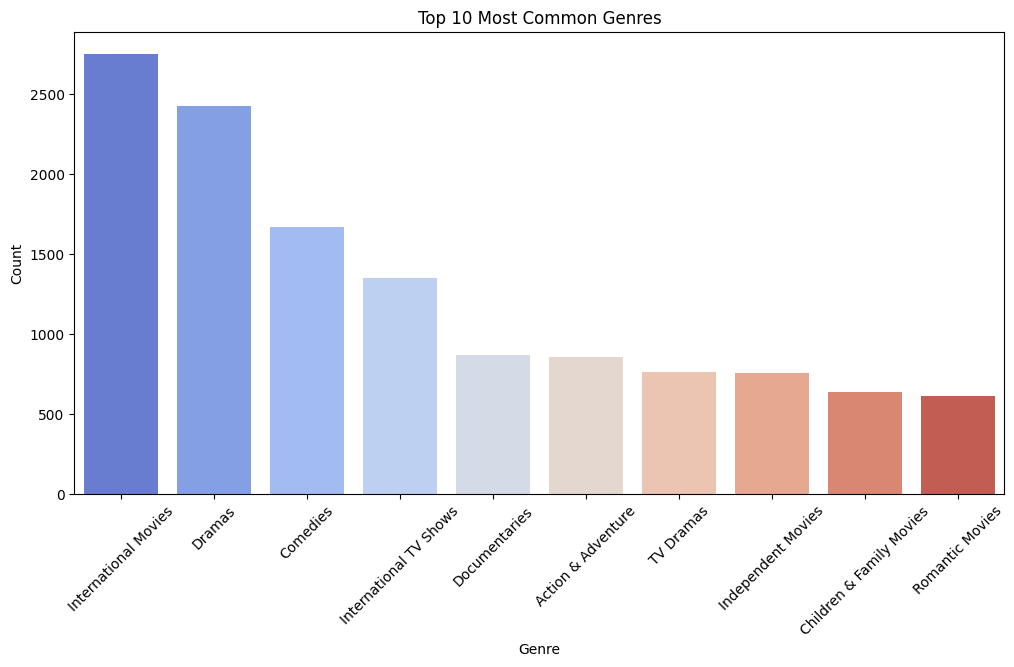

In [ ]:
#Bar plot for Top Genres
top_genres = genre_details['genre_det'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()



In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Movie_Mins', 'Num_of_seasons', 'genres'],
      dtype='object')

In [ ]:
categorical_columns = ['type', 'country', 'release_year', 'rating']
for i in categorical_columns:
    print(f'Top categories in {i}:')
    print(netflix[i].value_counts().head(10))
    print('\n' + '-'*50 + '\n')


Top categories in type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

--------------------------------------------------

Top categories in country:
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

--------------------------------------------------

Top categories in release_year:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

--------------------------------------------------

Top categories in rating:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

--------------------------------------------------



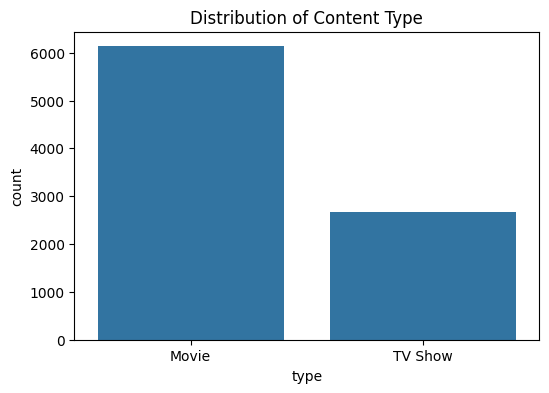

In [ ]:
#BarPlot Movies vs TV Shows
plt.figure(figsize=(6, 4))
sns.countplot(data=netflix,x='type')
plt.title('Distribution of Content Type')
plt.show()


The above chart shows that the movies are more popular than the TV Show.

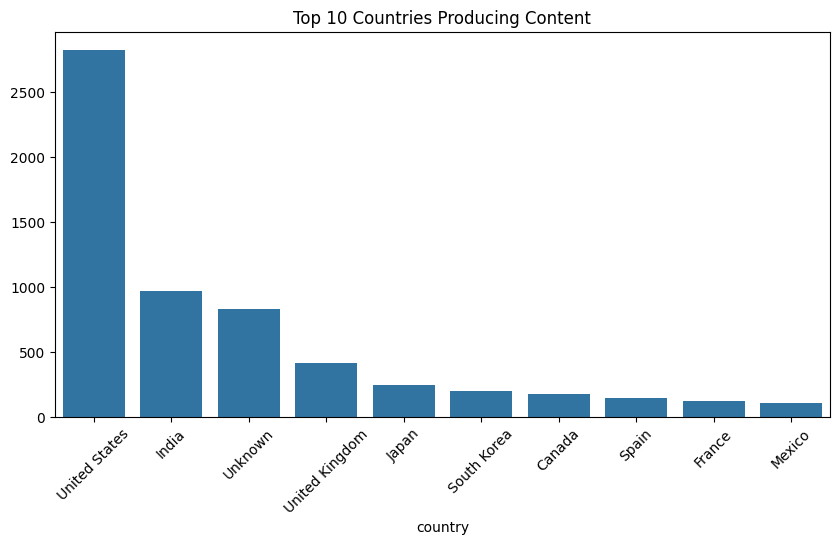

In [ ]:
#Country-wise distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=netflix['country'].value_counts().head(10).index,
            y=netflix['country'].value_counts().head(10).values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries Producing Content')
plt.show()


The above plot shows that United States produces more number of netflix content followed by India and so on.(There are some Unknown enteries also in the dataset)

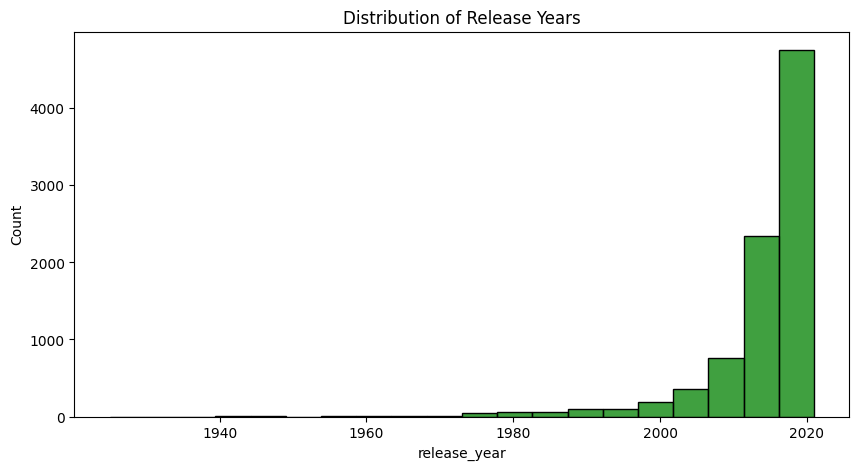

In [ ]:
#Release Year distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=netflix,x='release_year',bins=20,color='green')
plt.title('Distribution of Release Years')
plt.show()


The above plot depicts that in recent times there are more number of releases.

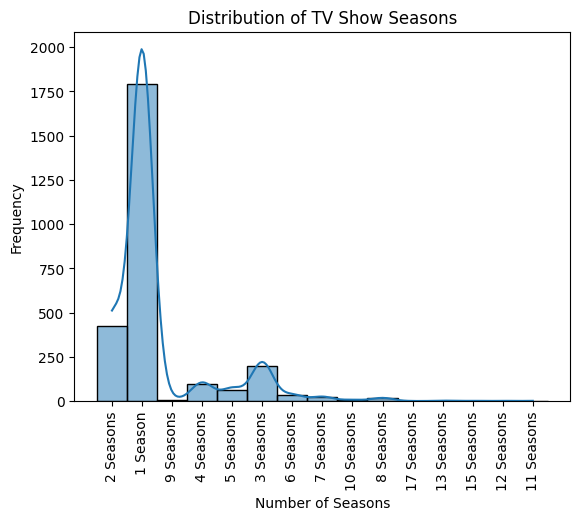

In [ ]:
# Plot distribution for Number of Seasons
sns.histplot(netflix["Num_of_seasons"], bins=10, kde=True)
plt.xlabel("Number of Seasons")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("Distribution of TV Show Seasons")
plt.show()


The above plot suggests that most TV shows have only 1 or 2 seasons—which aligns with Netflix's trend of short series and limited-season originals.


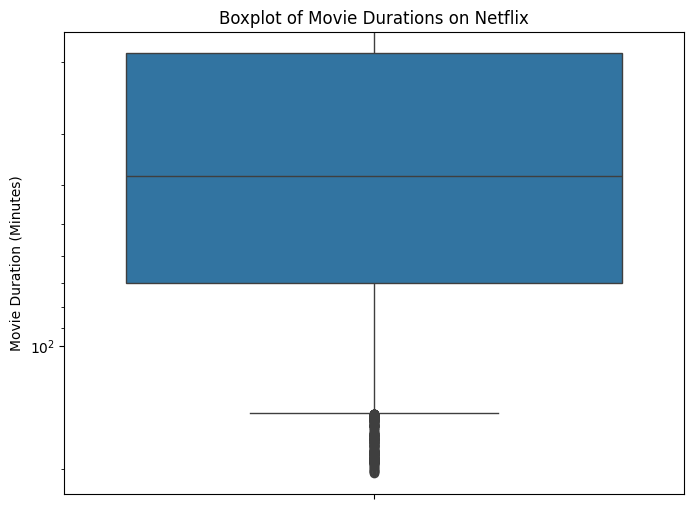

In [ ]:
#Boxplot of Movie Durations on Netflix
plt.figure(figsize=(8, 6))
sns.boxplot(y=netflix["Movie_Mins"])

plt.ylabel("Movie Duration (Minutes)")
plt.title("Boxplot of Movie Durations on Netflix")
plt.yscale("log") # to compress large values
plt.show()






Key Observations are:
- The median duration is around 100 minutes, which aligns with standard movie lengths.
- Some movies have significantly lower durations (below the lower whisker), suggesting that Netflix has a selection of short films or specials.


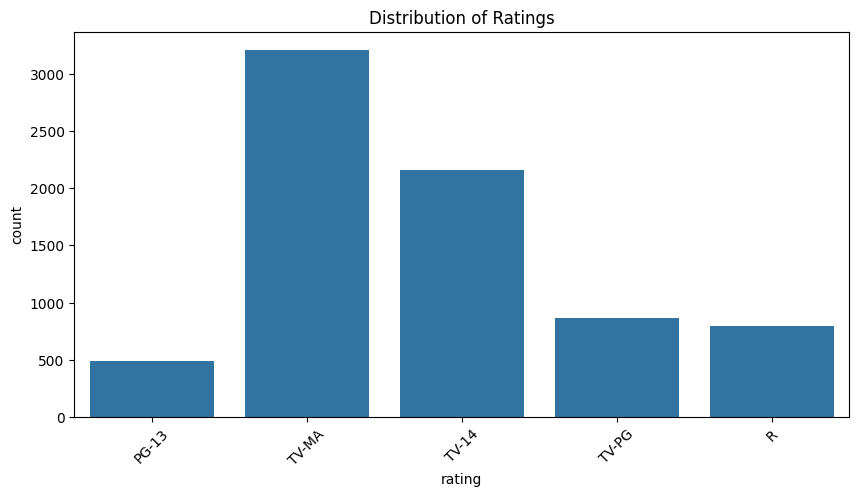

In [ ]:
#Top 5 categories in rating
plt.figure(figsize=(10, 5))
sns.countplot(data=netflix[netflix['rating'].isin(netflix['rating'].value_counts().head(5).index)], x='rating')

plt.xticks(rotation=45)
plt.title('Distribution of Ratings')
plt.show()


The above plot shows the top5 rating categories.

In [ ]:
#Pair plot
#Median is useful for avoiding extreme outliers.
netflix["Movie_Mins"].fillna(netflix["Movie_Mins"].median(), inplace=True)
netflix["Num_of_seasons"].fillna(netflix["Num_of_seasons"].median(), inplace=True)

sns.pairplot(netflix)
plt.show()

TypeError: Cannot convert ['90 min' nan nan ... '88 min' '88 min' '111 min'] to numeric

Observations:
- Release Year Trends:
 The histogram suggests most Netflix content was released after 1950, with a peak around 2000–2020. This likely reflects Netflix's increasing content production in recent decades.
- Unchanging Values for Movie_Mins & Num_of_seasons:
 The scatter plots for Movie_Mins and Num_of_seasons appear as vertical/horizontal lines because they only have one unique value each.
 If these values should vary, they may need data cleaning or correct extraction from the dataset.
- Week Number Distribution:
 The histogram for week_number shows values ranging from 0 to 50, representing content release trends across different weeks of the year.
- Relationship Between Release_Year and Week_Number:
- The scatter plot shows a dense clustering, possibly indicating seasonal release patterns—certain years may have higher content releases in specific weeks.


Q2. Comparison of tv shows vs. movies.

In [ ]:
#a. Find the number of movies produced in each country and pick the top 10 countries

In [ ]:
netflix.head()

In [ ]:
director_details.head()

In [ ]:
merged_df = pd.merge(netflix, director_details, on='title', how='inner')
movies_df = merged_df[merged_df['type'] == 'Movie']
result = movies_df.groupby('country')['title'].nunique().reset_index()
result.columns = ['country', 'movie_count']
result = result.sort_values(by='movie_count', ascending=False)
result.head(10)


The above plot shows that United States has the highest movie count (2,058), showing that American films make up a significant portion of the available content. This could indicate global popularity or Netflix's preference for U.S.-produced movies.
Also - India ranks second with 893 movies, highlighting the strong presence of Bollywood and Indian regional films. Given India's massive film industry and growing streaming audience, this is expected.



In [ ]:
#b. Find the number of Tv-Shows produced in each country and pick the top 10 countries

In [ ]:
tvshow_df = merged_df[merged_df['type'] == 'TV Show']
result = tvshow_df.groupby('country')['title'].nunique().reset_index()
result.columns = ['country', 'show_count']
result = result.sort_values(by='show_count', ascending=False)
result.head(10)

The above output suggest that - The United States has the highest show count (760),followed by UK, indicating that American TV shows form a major portion of the available content. This aligns with global trends, as U.S. entertainment exports are widely consumed worldwide.
-With 391 shows marked as "Unknown," it’s likely that metadata is missing or inconsistent. This could impact analysis if country-based trends are needed.


3. What is the best time to launch a TV show?

In [ ]:
# a.&b. Find which is the best week to release the Movie & TV Show separately?

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%B %d, %Y', errors='coerce')
netflix['week_number'] = netflix['date_added'].dt.isocalendar().week

# Separate movies and TV shows
movies_df = netflix[netflix['type'] == 'Movie']
tvshow_df = netflix[netflix['type'] == 'TV Show']

# Group by week and count separately
movies_weekly_counts = movies_df.groupby('week_number')['title'].count().reset_index()
tvshows_weekly_counts = tvshow_df.groupby('week_number')['title'].count().reset_index()

# Rename columns for clarity
movies_weekly_counts.columns = ['week_number', 'movie_count']
tvshows_weekly_counts.columns = ['week_number', 'tv_show_count']

# Find the best week for each category
# Sort by 'movie_count' and take the first row
best_movie_week = movies_weekly_counts.sort_values(by='movie_count', ascending=False).iloc[0]
# Sort by 'tv_show_count' and take the first row
best_tv_show_week = tvshows_weekly_counts.sort_values(by='tv_show_count', ascending=False).iloc[0]

print("Best week to release a movie:", best_movie_week)
print("Best week to release a TV show:", best_tv_show_week)


The above output shows that the first week of the year appears to be the most common week for Netflix to release movies(with movie_count=316). This could be influenced by New Year's holiday trends resulting in higher viewership.
Also, The 27th week(with tv_show_count=85), which falls around mid-year (June-July), appears to be a prime time for TV show releases. This might be due to summer vacations when audiences have more time to binge-watch new series.

Q4. Analysis of actors/directors of different types of shows/movies.

In [ ]:
#a&b Identify the top 10 directors who have appeared in most movies or TV shows separately

In [ ]:
merged_df.head() #this contains the netflix and director_details together.

In [ ]:
movies_df = merged_df[(merged_df['type'] == 'Movie') & (merged_df['dname'] != 'Unknown Director')]
tvshow_df = merged_df[(merged_df['type'] == 'TV Show') & (merged_df['dname'] != 'Unknown Director')]


movie_director_counts = movies_df.groupby('dname')['title'].nunique().reset_index()
tvshow_director_counts = tvshow_df.groupby('dname')['title'].nunique().reset_index()

top_10_movie_directors = movie_director_counts.sort_values(by='title', ascending=False).head(10)
top_10_tvshow_directors = tvshow_director_counts.sort_values(by='title', ascending=False).head(10)

top_10_movie_directors.columns = ['director', 'unique_movie_count']
top_10_tvshow_directors.columns = ['director', 'unique_tvshow_count']

print("Top 10 Directors for Movies:")
print(top_10_movie_directors)

print("\nTop 10 Directors for TV Shows:")
print(top_10_tvshow_directors)

- Rajiv Chilaka leads with 22 unique movies—likely known for animated or children's content.
- Ken Burns and Alastair Fothergill top the list with 3 unique shows—possibly documentary-driven.


  Q5. Which genre movies are more popular or produced more?
  Hint : We want you to apply the word cloud on the genre columns to know which kind
of genre is produced

In [ ]:
from wordcloud import WordCloud


In [ ]:
netflix.head()

In [ ]:
# Ensure all genre values are strings
netflix['genres'] = netflix['genres'].astype(str)

genres_df = netflix['genres'].dropna().str.split(',').explode()
# Remove leading/trailing spaces
genres_df = genres_df.str.strip()

# Combine all genre values into a single string
genre_text = " ".join(genres_df)
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(genre_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for better visualization
plt.title("Most Produced Movie Genres")
plt.show()


Hence, in above wordplot the most frequently occurring genres appear larger and bolder, while less common genres appear smaller. This gives a quick snapshot of dominant genres.

Q6. Find After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)

In [ ]:
movies_only = netflix[netflix["type"] == "Movie"]
movies_only['date_added'] = pd.to_datetime(movies_only['date_added'])

movies_only['days_to_netflix']=(movies_only['date_added']-pd.to_datetime(movies_only['release_year'], format="%Y")).dt.days

mode_days = movies_only["days_to_netflix"].mode()[0]

print(f"Most common number of days a movie is added to Netflix after the release is : {mode_days} days")


Hence,based on the dataset, the most frequent waiting period before a movie appears on Netflix after its theatrical release is 334 days (about 11 months).


FINAL RECOMMENDATIONS:
Based on my analysis, here are some clear, actionable recommendations for Netflix to improve content strategy and viewer engagement:
1. Address the "Unknown" Data Gap
- Improve metadata accuracy to ensure movies and shows have clear director and country information.
- Work with studios to standardize data collection, making searching and categorization easier for users.
2. Expand International Content
- Since International Movies are the most popular genre, invest in more non-U.S. productions to engage global audiences.
- Strengthen partnerships with Indian and UK filmmakers since India ranks second in movie production and UK ranks second in TV shows.
3. Optimize Release Timing
- Capitalize on the first week of the year for movie releases—high engagement from holiday streaming means premium titles should be launched then.
- Utilize mid-year (June-July) for TV shows, as people binge-watch more during summer vacations.
4. Focus on Proven Directors
- Rajiv Chilaka leads in content volume—explore further collaborations in animated or children's entertainment.
- Ken Burns and Alastair Fothergill excel in documentaries—invest in similar creators to strengthen the documentary catalog.
5. Reduce the Waiting Period for Movie Releases
- With an average waiting time of 334 days before theatrical movies appear on Netflix, shorten the gap to 6-9 months for select popular films.
- Consider exclusive streaming deals to get movies sooner and attract more subscribers.
6. Balance Movies & TV Shows
- Movies dominate over TV shows in popularity—continue strong investments in films while strategically promoting high-quality TV series.
- Strengthen TV show marketing and invest in binge-worthy formats to increase engagement.
These recommendations focus on improving content availability, optimizing release strategies, and making data more accurate, all of which will enhance viewer experience and strengthen Netflix’s market presence.
